### Load libraries.

In [1]:
import geopandas as geopd
import pandas as pd

### Load Mexico shape file. Source: Marco Geoestadístico INEGI (2023).
#### URL: https://www.inegi.org.mx/temas/mg/ 

In [2]:
# INEGI data
gdf = geopd.read_file("../dataset/Mexico/geometry/2023_1_00_MUN/2023_1_00_MUN.shp")

### Display data frame entries

- CVEGEO: Geoestatistical code provided by INEGI.
- CVE_ENT: State code provided by INEGI.
- CVE_MUN: Municipality code provided by INEGI.
- NOMGEO: Municipality name provided by INEGI.
- geometry: Municipality boundary provided by INEGI (polygons).

In [3]:
display(gdf)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01008,01,008,San José de Gracia,"POLYGON ((-102.45537 22.31212, -102.45501 22.3..."
1,01009,01,009,Tepezalá,"POLYGON ((-102.17738 22.36243, -102.17968 22.3..."
2,01007,01,007,Rincón de Romos,"POLYGON ((-102.22684 22.37393, -102.22661 22.3..."
3,01006,01,006,Pabellón de Arteaga,"POLYGON ((-102.25345 22.18302, -102.25130 22.1..."
4,01005,01,005,Jesús María,"POLYGON ((-102.35391 22.06255, -102.35312 22.0..."
...,...,...,...,...,...
2470,32029,32,029,Miguel Auza,"POLYGON ((-103.43211 24.35769, -103.43133 24.3..."
2471,32028,32,028,Mezquital del Oro,"POLYGON ((-103.28714 21.34599, -103.28698 21.3..."
2472,32011,32,011,Trinidad García de la Cadena,"POLYGON ((-103.43530 21.32920, -103.43494 21.3..."
2473,32027,32,027,Melchor Ocampo,"POLYGON ((-102.29548 25.12519, -102.26655 25.1..."


### Stationary pollution sources in SLP. Display data frame entries. Source DENUE-INEGI.
#### URL: https://www.inegi.org.mx/app/mapa/denue/default.aspx

- cve_ent: State code provided by INEGI.
- nom_ent: Municipality name provided by INEGI.
- actividad: Industrial activity
- geometry: Geographical coordinates, longitude and latitude.

In [4]:
# Plot stationary pollution sources 

df = pd.read_csv("../dataset/Mexico/stationary_pollution_sources/stationary_pollution_sources.csv")
df_slp = df[ df["cve_ent"] == 24 ] 
gdf_stationary_pullution_sources = geopd.GeoDataFrame(
    df_slp, geometry=geopd.points_from_xy(df_slp.X,df_slp.Y, crs="epsg:4326",
))
display(gdf_stationary_pullution_sources)


,id,cve_ent,nom_ent,actividad,X,Y,Unnamed: 6,geometry
0,FQ1,24,San Luis Potosí,Fabricacion de Quimicos,-100.876628,22.102930,NaN,POINT (-100.87663 22.10293)
1,FQ2,24,San Luis Potosí,Fabricacion de Quimicos,-100.992320,22.166703,NaN,POINT (-100.99232 22.16670)
2,FQ3,24,San Luis Potosí,Fabricacion de Quimicos,-100.879019,22.069436,NaN,POINT (-100.87902 22.06944)
3,FQ4,24,San Luis Potosí,Fabricacion de Quimicos,-100.893507,22.061079,NaN,POINT (-100.89351 22.06108)
4,FQ5,24,San Luis Potosí,Fabricacion de Quimicos,-100.882499,22.071247,NaN,POINT (-100.88250 22.07125)
...,...,...,...,...,...,...,...,...
771,BIOTAMC03,24,San Luis Potosí,Biomasa,-98.814128,21.560987,NaN,POINT (-98.81413 21.56099)
772,BIOTANES01,24,San Luis Potosí,Biomasa,-98.663943,21.599224,NaN,POINT (-98.66394 21.59922)
773,BIOTANES02,24,San Luis Potosí,Biomasa,-98.662509,21.600438,NaN,POINT (-98.66251 21.60044)
774,BIOTANES03,24,San Luis Potosí,Biomasa,-98.661218,21.604151,NaN,POINT (-98.66122 21.60415)


### Plot stationary pollution sources in SLP.

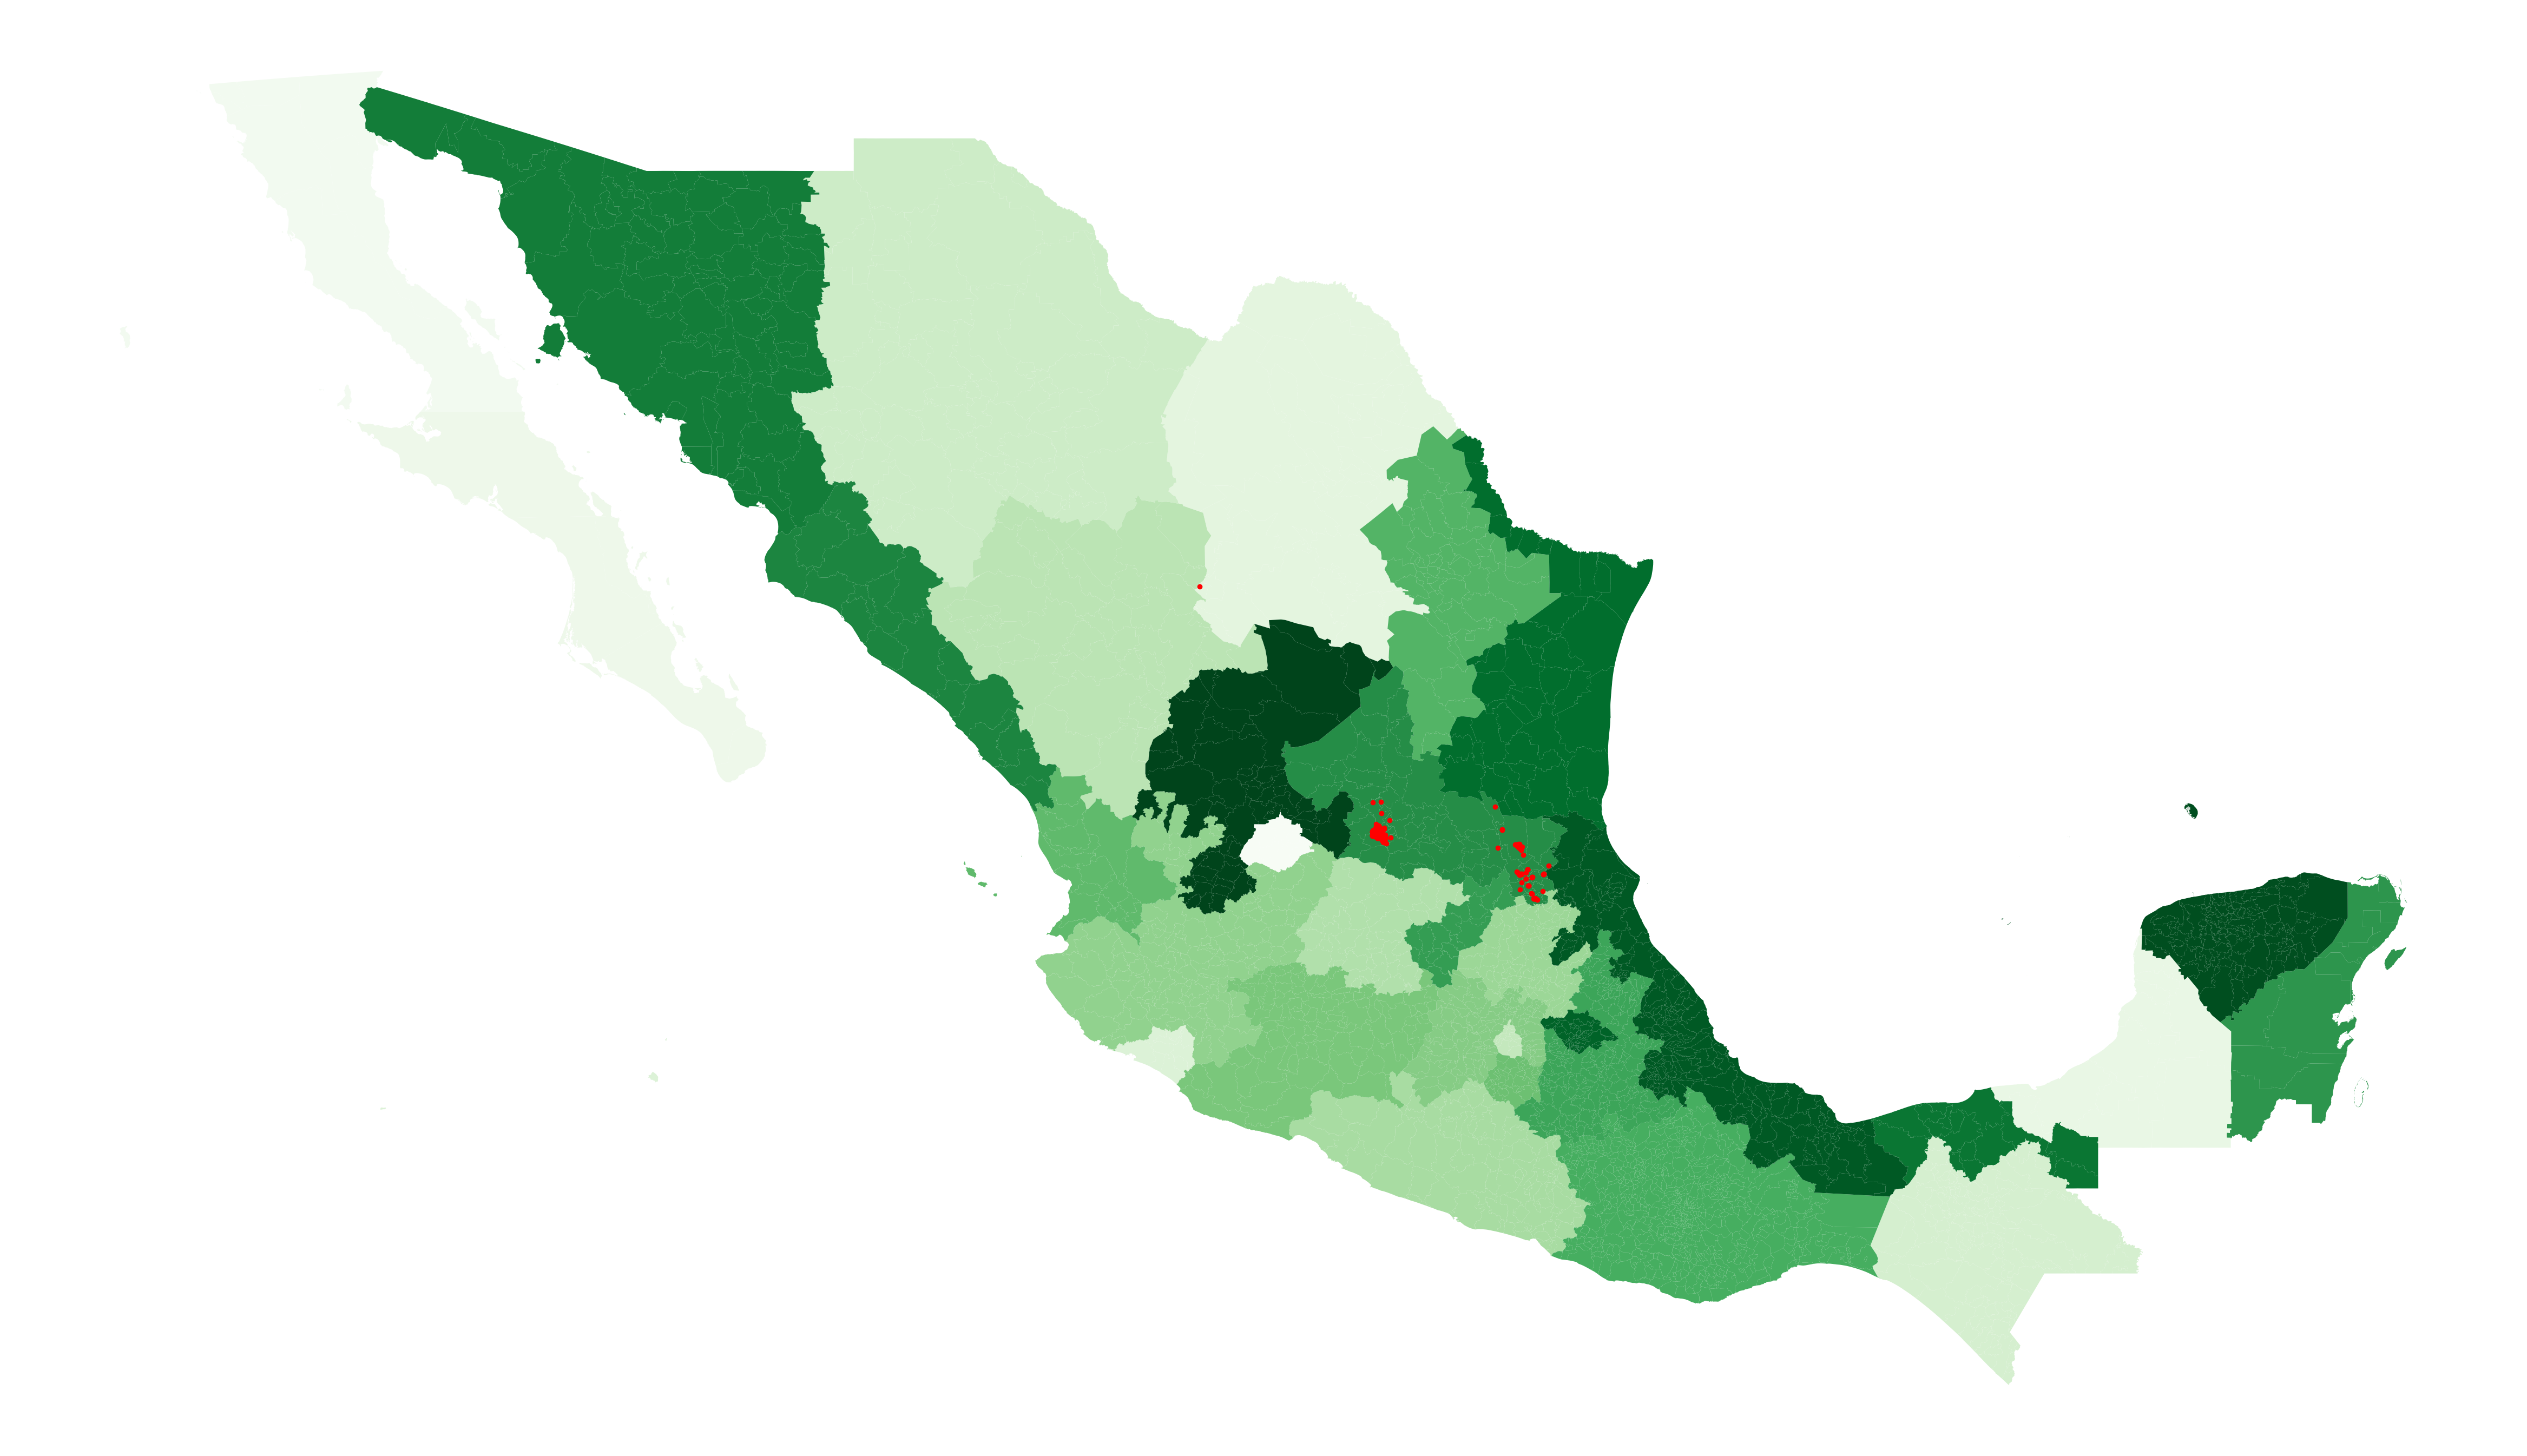

In [5]:
ax = gdf.plot(figsize = (60, 60),column="CVE_ENT",cmap="Greens")
gdf_stationary_pullution_sources.plot(ax=ax,figsize = (60, 60),aspect=1, color="red")
ax.set_axis_off()